# Workshop: Kernel Machines

1. Generating test data
2. Support Vector Machines
3. Kernelized Support Vector Machines

## 1. Generating test data

Why is the generation of test data important?

1. We can generate quickly and easiliy data that suits our needs (e.g., emulates real world data)
2. We can force "known" and "understood" outcomes for comparison with predictions
3. We can impude stochastic randomness based on our needs
4. We can visualize it easiliy 
5. We can scale it up quickly

### Generating Test data for classification

Documentation: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

##### Blob Data

In [16]:
# generate 2d classification dataset
from sklearn.datasets import make_blobs

# n_samples  = 100 => 100 data points
# centers    = 3   => 3 "clusters"
# n_features = 2   => 2 independent variables
# cluster_std = 1.0 => Standard deviation of the clusters  
X, y = make_blobs(n_samples=100, centers=3, n_features=2, cluster_std=1.0)

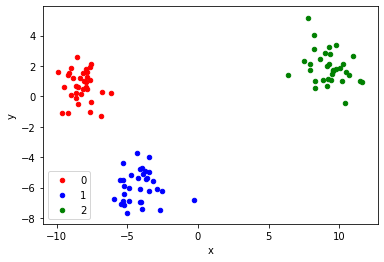

In [17]:
# Plot data
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

# Create dictionary based on toy data
tmp_dict = dict(x=X[:,0], y=X[:,1], label=y)

# scatter plot, dots colored by class value
df = DataFrame(tmp_dict)

# Each label will get its own coloring 
colors = {0:'red', 1:'blue', 2:'green'}

# Create figure and ax object (recall last workshop)
fig, ax = pyplot.subplots()

# Group By Labels
grouped = df.groupby('label')

# Plot each group (i.e., label)
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

##### Moons Data

In [24]:
# generate 2d classification dataset
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.1)

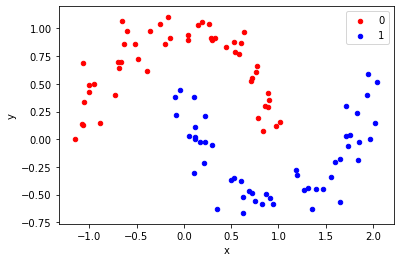

In [25]:
# Plot data
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

# Create dictionary based on toy data
tmp_dict = dict(x=X[:,0], y=X[:,1], label=y)

# scatter plot, dots colored by class value
df = DataFrame(tmp_dict)

# Each label will get its own coloring 
colors = {0:'red', 1:'blue', 2:'green'}

# Create figure and ax object (recall last workshop)
fig, ax = pyplot.subplots()

# Group By Labels
grouped = df.groupby('label')

# Plot each group (i.e., label)
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

#####  Advanced classification data

In [45]:
# generate 2d classification dataset
from sklearn.datasets import make_classification

# n_redundant - The number of redundant features. These features are generated as random linear combinations of the informative features
# n_informativeint, optional (default=2) - The number of informative features
# n_classes - Number of classes
# n_cluster_per_class - clusters within class
X, y = make_classification(n_samples=100, n_features = 2, n_redundant=0, n_informative=2, n_classes = 2,  n_clusters_per_class=2)



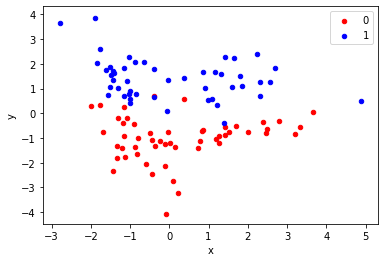

In [46]:
# Plot data
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

# Create dictionary based on toy data
tmp_dict = dict(x=X[:,0], y=X[:,1], label=y)

# scatter plot, dots colored by class value
df = DataFrame(tmp_dict)

# Each label will get its own coloring 
colors = {0:'red', 1:'blue', 2:'green'}

# Create figure and ax object (recall last workshop)
fig, ax = pyplot.subplots()

# Group By Labels
grouped = df.groupby('label')

# Plot each group (i.e., label)
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

##### Circle Data - ToDo: 10-15 minutes

In [46]:
# generate 2d classification dataset
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, noise=0.1)

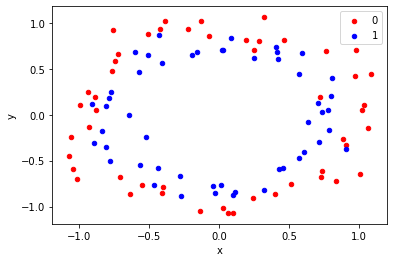

In [47]:
# Plot data
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

# Create dictionary based on toy data
tmp_dict = dict(x=X[:,0], y=X[:,1], label=y)

# scatter plot, dots colored by class value
df = DataFrame(tmp_dict)

# Each label will get its own coloring 
colors = {0:'red', 1:'blue', 2:'green'}

# Create figure and ax object (recall last workshop)
fig, ax = pyplot.subplots()

# Group By Labels
grouped = df.groupby('label')

# Plot each group (i.e., label)
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

In [48]:
def visualize(X, y):
    # Plot data
    from sklearn.datasets import make_blobs
    from matplotlib import pyplot
    from pandas import DataFrame

    # Create dictionary based on toy data
    tmp_dict = dict(x=X[:,0], y=X[:,1], label=y)

    # scatter plot, dots colored by class value
    df = DataFrame(tmp_dict)

    # Each label will get its own coloring 
    colors = {0:'red', 1:'blue', 2:'green'}

    # Create figure and ax object (recall last workshop)
    fig, ax = pyplot.subplots()

    # Group By Labels
    grouped = df.groupby('label')

    # Plot each group (i.e., label)
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

## 2. Support Vector Machines

##### Linear Data - Binary Case

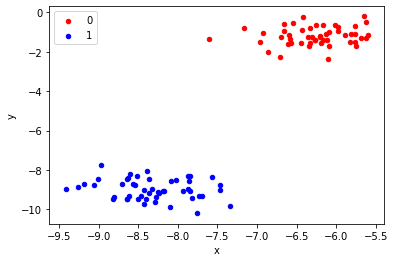

In [55]:
# generate 2d classification dataset
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=0.5)
visualize(X,y)

# Split data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [56]:
from sklearn.svm import SVC 

# Train SVC 
model = SVC()
model.fit(X_train, y_train)

/Users/demircanm/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [57]:
# Make prediction 
y_pred = model.predict(X_test)

<img src='resources/img1.png'>

<img src='resources/img2.png'>

In [58]:
# Evaluate Model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[ 9  0]
 [ 0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [59]:
# get support vectors
model.support_vectors_

array([[ -7.60441379,  -1.37367933],
       [ -5.62694143,  -0.5002168 ],
       [ -6.10617456,  -2.35739793],
       [ -6.42007841,  -0.23522202],
       [ -9.41629648,  -8.98565053],
       [ -7.33527484,  -9.85615173],
       [ -7.75926676, -10.20878028],
       [ -7.57313442,  -8.35062695],
       [ -8.97451249,  -7.74478387]])

In [60]:
# get indices of support vectors
model.support_

array([ 8, 27, 47, 74, 12, 16, 29, 31, 78], dtype=int32)

In [61]:
# get number of support vectors for each class
model.n_support_

array([4, 5], dtype=int32)

##### Linear Data - Multi-Class Case

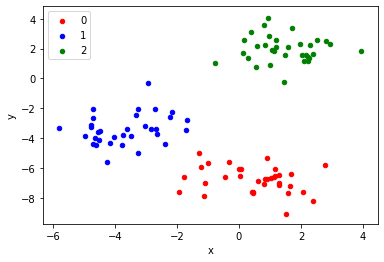

In [62]:
# generate 2d classification dataset
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=3, n_features=2, cluster_std=1.0)
visualize(X,y)

# Split data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [63]:
# Model (decision_function_shape = 'ovo'; creates )
model = SVC(decision_function_shape='ovo') # N classes => N*(N-1)/2
model.fit(X_train, y_train)

/Users/demircanm/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [64]:
# Make prediction 
y_pred = model.predict(X_test)

In [65]:
# Evaluate Model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[7 0 0]
 [0 7 0]
 [0 0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



### Kernelized Support Vector Machines

<img src='resources/img3.png'>

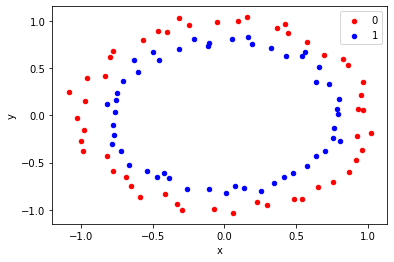

In [66]:
# generate 2d classification dataset
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, noise=0.04)
visualize(X,y)

# Split data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [67]:
from sklearn.svm import SVC

# Train SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [68]:
# Make prediction 
y_pred = model.predict(X_test)

In [69]:
# Evaluate Model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[ 0 12]
 [ 0  8]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.40      1.00      0.57         8

    accuracy                           0.40        20
   macro avg       0.20      0.50      0.29        20
weighted avg       0.16      0.40      0.23        20



/Users/demircanm/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### Custom Kernels

In [170]:
import numpy as np
from sklearn import svm
def my_kernel(X, Y):
    return np.dot(X, Y.T) # whatever you want (but limited to kernel properties)

model = svm.SVC(kernel=my_kernel)

##### Using the RBF kernel to classify circular data

In [ ]:
# ToDo: 15 Minutes

In [76]:
from sklearn.svm import SVC

# Train SVC 
# gamma = Kernel coefficient for ‘rbf’
# if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
# if ‘auto’, uses 1 / n_features.

# In detail description: 
# https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py

# C is the cost of misclassification => Higher C => Low Bias & High Variance
# Gamma = bandwidth => Lower Gamma => Lower Bias & High Variance

# Use Grid Search to find optimal hyperparameters

#model = SVC(kernel='rbf')

model = SVC(kernel='rbf', gamma='scale', C=1)
model.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
# Make prediction 
y_pred = model.predict(X_test)

In [78]:
# Evaluate Model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[ 0 12]
 [ 0  8]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.40      1.00      0.57         8

    accuracy                           0.40        20
   macro avg       0.20      0.50      0.29        20
weighted avg       0.16      0.40      0.23        20



/Users/demircanm/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
